In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, GridSearchCV

from GELM import GELMClassifier

In [2]:
X, y = load_digits(return_X_y=True)
print(X.shape)

(1797, 64)


In [3]:
scores = cross_val_score(GELMClassifier(l1=2**0, l2=2**10, random_state=42), X, y)
print(np.mean(scores))
print(scores)

0.9560538532961932
[0.95555556 0.92777778 0.96935933 0.96935933 0.95821727]


In [4]:
gelm = GELMClassifier(random_state=42)
parameters = {
    'l1': [2**i for i in np.arange(-100, 100, 10).astype(float)],
    'l2': [2**i for i in np.arange(-100, 100, 10).astype(float)]
}

clf = GridSearchCV(gelm, parameters, n_jobs=-1)
clf.fit(X,y)

GridSearchCV(estimator=GELMClassifier(random_state=42), n_jobs=-1,
             param_grid={'l1': [7.888609052210118e-31, 8.077935669463161e-28,
                                8.271806125530277e-25, 8.470329472543003e-22,
                                8.673617379884035e-19, 8.881784197001252e-16,
                                9.094947017729282e-13, 9.313225746154785e-10,
                                9.5367431640625e-07, 0.0009765625, 1.0, 1024.0,
                                1048576.0, 1073741824.0, 1099511627776.0,
                                11258999...
                         'l2': [7.888609052210118e-31, 8.077935669463161e-28,
                                8.271806125530277e-25, 8.470329472543003e-22,
                                8.673617379884035e-19, 8.881784197001252e-16,
                                9.094947017729282e-13, 9.313225746154785e-10,
                                9.5367431640625e-07, 0.0009765625, 1.0, 1024.0,
                                1048576.0, 1073741824.0, 1099511627776.0,
                                1125899906842624.0, 1.152921504606847e+18,
                                1.1805916207174113e+21, 1.2089258196146292e+24,
                                1.2379400392853803e+27]})

Best accuracy: 0.9566125038687712
At: l1 = 2**-100.0, l2 = 2**10.0


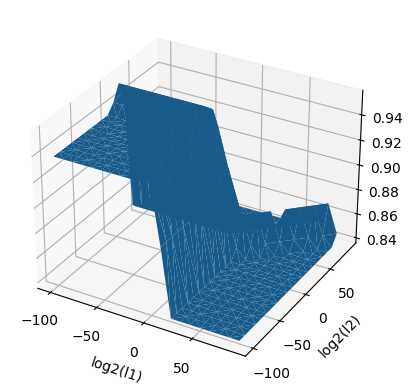

In [5]:
print(f'Best accuracy: {clf.best_score_}')
print(f'At: l1 = 2**{np.log2(clf.best_params_["l1"])}, l2 = 2**{np.log2(clf.best_params_["l2"])}')
l1s = clf.cv_results_['param_l1'].data.astype(float)
l2s = clf.cv_results_['param_l2'].data.astype(float)
scs = clf.cv_results_['mean_test_score']

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(np.log2(l1s), np.log2(l2s), Z=scs)
ax.set_xlabel('log2(l1)')
ax.set_ylabel('log2(l2)')
plt.show()